Data: https://www.ebi.ac.uk/chembl/explore/activities/eyJkYXRhc2V0Ijp7ImVudGl0eUlEIjoiQWN0aXZpdHkiLCJpbml0aWFsUXVlcnkiOnsicXVlcnkiOnsiYm9vbCI6eyJtdXN0IjpbeyJxdWVyeV9zdHJpbmciOnsicXVlcnkiOiJ0YXJnZXRfY2hlbWJsX2lkOkNIRU1CTDE5NjMgQU5EIHN0YW5kYXJkX3R5cGU6XCJJQzUwXCIifX1dfX19LCJmYWNldHNTdGF0ZSI6bnVsbCwiY3VzdG9tRmlsdGVyaW5nIjoidGFyZ2V0X2NoZW1ibF9pZDpDSEVNQkwxOTYzIEFORCBzdGFuZGFyZF90eXBlOlwiSUM1MFwiIiwic3Vic2V0SHVtYW5EZXNjcmlwdGlvbiI6IkJpb2FjdGl2aXR5IGRhdGEgZm9yIHRhcmdldCBDSEVNQkwxOTYzIChUaHlyb2lkIHN0aW11bGF0aW5nIGhvcm1vbmUgcmVjZXB0b3IpIC0gSUM1MCIsImV4YWN0VGV4dEZpbHRlcnMiOnt9fX0%3D

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
import warnings
warnings.filterwarnings("ignore")


In [2]:
def getDescriptorsFromDF(df):
    descriptors = []
    for _, row in df.iterrows():
        name = row['Molecule ChEMBL ID']
        smiles = row['Smiles']
        molecule = Chem.MolFromSmiles(smiles)
        if molecule:
            desc = {desc_name: desc_func(molecule) for desc_name, desc_func in Descriptors.descList}
            desc['Molecule ChEMBL ID'] = name
            descriptors.append(desc)
        else:
            descriptors.append({'Molecule ChEMBL ID': name, 'Error': 'Invalid SMILES'})
    
    # Convert the list of descriptors to a DataFrame
    descriptors_df = pd.DataFrame(descriptors)
    return descriptors_df

In [3]:
# Load ChEMBL dataset (replace with actual file)
# Bioactivity data for target CHEMBL1963 (Thyroid stimulating hormone receptor) - IC50
# Load ChEMBL Data
df = pd.read_csv("C:/BIOINFORMATICS/GitDemo/Self-learning/BioinformaticsScripts/Project/QSAR/CHEMBL1963_TSH_IC50.tsv",sep="\t")  # Replace with your actual CSV file

# Compute descriptors
df_descriptors = getDescriptorsFromDF(df)
# print(df_descriptors.head())

# Convert to DataFrame
df_descriptors = df_descriptors.dropna()

# Merge with original dataset
df_final = pd.concat([df, df_descriptors], axis=1)

# # Save processed dataset
print("Molecular descriptors calculated")
df_final.head()


[02:05:49] DEPRECATION WARNING: please use MorganGenerator
[02:05:49] DEPRECATION WARNING: please use MorganGenerator
[02:05:49] DEPRECATION WARNING: please use MorganGenerator
[02:05:49] DEPRECATION WARNING: please use MorganGenerator
[02:05:49] DEPRECATION WARNING: please use MorganGenerator
[02:05:49] DEPRECATION WARNING: please use MorganGenerator
[02:05:49] DEPRECATION WARNING: please use MorganGenerator
[02:05:49] DEPRECATION WARNING: please use MorganGenerator
[02:05:49] DEPRECATION WARNING: please use MorganGenerator
[02:05:49] DEPRECATION WARNING: please use MorganGenerator
[02:05:49] DEPRECATION WARNING: please use MorganGenerator
[02:05:49] DEPRECATION WARNING: please use MorganGenerator
[02:05:49] DEPRECATION WARNING: please use MorganGenerator
[02:05:49] DEPRECATION WARNING: please use MorganGenerator
[02:05:49] DEPRECATION WARNING: please use MorganGenerator
[02:05:49] DEPRECATION WARNING: please use MorganGenerator
[02:05:49] DEPRECATION WARNING: please use MorganGenerat

Molecular descriptors calculated


[02:05:50] DEPRECATION WARNING: please use MorganGenerator
[02:05:50] DEPRECATION WARNING: please use MorganGenerator
[02:05:50] DEPRECATION WARNING: please use MorganGenerator
[02:05:50] DEPRECATION WARNING: please use MorganGenerator
[02:05:50] DEPRECATION WARNING: please use MorganGenerator
[02:05:50] DEPRECATION WARNING: please use MorganGenerator
[02:05:50] DEPRECATION WARNING: please use MorganGenerator
[02:05:50] DEPRECATION WARNING: please use MorganGenerator
[02:05:50] DEPRECATION WARNING: please use MorganGenerator
[02:05:50] DEPRECATION WARNING: please use MorganGenerator
[02:05:50] DEPRECATION WARNING: please use MorganGenerator
[02:05:50] DEPRECATION WARNING: please use MorganGenerator
[02:05:50] DEPRECATION WARNING: please use MorganGenerator
[02:05:50] DEPRECATION WARNING: please use MorganGenerator
[02:05:50] DEPRECATION WARNING: please use MorganGenerator
[02:05:50] DEPRECATION WARNING: please use MorganGenerator
[02:05:50] DEPRECATION WARNING: please use MorganGenerat

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,Molecule ChEMBL ID
0,CHEMBL5288869,NaN,NaN,374.49,0,4.03,51,CC(=O)N1c2cnc(NC(=O)OCC(C)C)nc2C2(CCCCC2)C1(C)C,IC50,'=',...,0,0,0,0,0,0,0,0,0,CHEMBL5288869
1,CHEMBL3983689,NaN,NaN,413.52,1,5.18,BDBM60844,CC(=O)N1c2ccc(NC(=O)c3ccccn3)cc2C(C)(c2ccccc2)...,IC50,'<',...,0,0,0,0,0,0,0,0,0,CHEMBL3983689
2,CHEMBL5287707,NaN,NaN,476.96,1,5.29,63,CC(=O)N1c2cnc(NC(=O)CCc3cccc(Cl)c3)nc2C2(CCC(F...,IC50,'=',...,0,0,0,0,0,0,0,0,0,CHEMBL5287707
3,CHEMBL5267037,NaN,NaN,439.99,1,5.65,36,CC(=O)N1c2ncc(NC(=O)CCc3cccc(Cl)c3)cc2C2(CCCCC...,IC50,'=',...,0,0,0,0,0,0,0,0,0,CHEMBL5267037
4,CHEMBL5268512,NaN,NaN,387.52,1,5.02,35,CC(=O)N1c2ncc(NC(=O)OCC(C)(C)C)cc2C2(CCCCC2)C1...,IC50,'=',...,0,0,0,0,0,0,0,0,0,CHEMBL5268512


In [4]:
# Convert Standard Value to pIC50 (QSAR target variable)
df_final['Standard Value'] = df_final['Standard Value'].astype(float)
df_final['pIC50'] = -np.log10(df_final['Standard Value'] * 1e-9)  # Convert to pIC50
df_final[['pChEMBL Value','Standard Value','pIC50']]

,pChEMBL Value,Standard Value,pIC50
0,7.35,45.0,7.346787
1,NaN,100.0,7.000000
2,7.46,35.0,7.455932
3,6.95,112.0,6.950782
4,7.04,91.0,7.040959
5,NaN,100.0,7.000000
6,NaN,100.0,7.000000
7,NaN,30000.0,4.522879
8,7.34,46.0,7.337242
9,7.25,56.0,7.251812


In [5]:
list(df_final.columns)

['Molecule ChEMBL ID',
 'Molecule Name',
 'Molecule Max Phase',
 'Molecular Weight',
 '#RO5 Violations',
 'AlogP',
 'Compound Key',
 'Smiles',
 'Standard Type',
 'Standard Relation',
 'Standard Value',
 'Standard Units',
 'pChEMBL Value',
 'Data Validity Comment',
 'Comment',
 'Uo Units',
 'Ligand Efficiency BEI',
 'Ligand Efficiency LE',
 'Ligand Efficiency LLE',
 'Ligand Efficiency SEI',
 'Potential Duplicate',
 'Assay ChEMBL ID',
 'Assay Description',
 'Assay Type',
 'BAO Format ID',
 'BAO Label',
 'Assay Organism',
 'Assay Tissue ChEMBL ID',
 'Assay Tissue Name',
 'Assay Cell Type',
 'Assay Subcellular Fraction',
 'Assay Parameters',
 'Assay Variant Accession',
 'Assay Variant Mutation',
 'Target ChEMBL ID',
 'Target Name',
 'Target Organism',
 'Target Type',
 'Document ChEMBL ID',
 'Source ID',
 'Source Description',
 'Document Journal',
 'Document Year',
 'Cell ChEMBL ID',
 'Properties',
 'Action Type',
 'Standard Text Value',
 'Value',
 'MaxAbsEStateIndex',
 'MaxEStateIndex',
 '

In [6]:
df_final.info()
# df_final.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Columns: 260 entries, Molecule ChEMBL ID to pIC50
dtypes: float64(124), int64(108), object(28)
memory usage: 117.9+ KB


In [7]:
# Drop non-numeric columns (except 'pIC50' target)
drop_columns = [
    "Molecule ChEMBL ID", "Molecule Name", "Compound Key", "Smiles", "Standard Type", 
    "Standard Relation", "Standard Units", "Data Validity Comment", "Comment",
    "Uo Units", "Assay ChEMBL ID", "Assay Description", "Assay Type", 
    "BAO Format ID", "BAO Label", "Assay Organism", "Assay Cell Type",
    "Target ChEMBL ID", "Target Name", "Target Organism", "Target Type",
    "Document ChEMBL ID", "Source ID", "Source Description", "Document Journal",
    "Cell ChEMBL ID", "Properties", "Action Type", "Standard Text Value", "Molecule Max Phase",
    "Assay Tissue ChEMBL ID","Assay Tissue Name","Assay Subcellular Fraction","Assay Variant Accession","Assay Variant Mutation"
]
df_final2 = df_final.drop(columns=drop_columns, errors='ignore')

# Drop rows with missing pIC50 values
df_final2 = df_final2.dropna(subset=["pIC50"])

# Fill missing values for other columns with median
# df_final2 = df_final2.fillna(df_final2.median())
df_final2 = df_final2.fillna(df_final2.select_dtypes(include=['number']).median())

# Define features (X) and target (y)
X = df_final2.drop(columns=["pIC50"])  # Features
y = df_final2["pIC50"]  # Target

# Normalize features
X = X.select_dtypes(include=['number'])  # Keep only numerical columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
print(X.info())  # Check data types and null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Columns: 222 entries, Molecular Weight to fr_urea
dtypes: float64(115), int64(107)
memory usage: 100.7 KB
None


In [9]:
# Feature selection using RFE
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rfe = RFE(rf, n_features_to_select=50)  # Select top 10 features
X_train_selected = rfe.fit_transform(X_train, y_train)
X_test_selected = rfe.transform(X_test)


# # Apply Recursive Feature Elimination (RFE)
# rf = RandomForestRegressor(n_estimators=100, random_state=42)
# rfe = RFE(rf, n_features_to_select=20)  # Select top 20 features
# X_train_selected = rfe.fit_transform(X_train, y_train)
# X_test_selected = rfe.transform(X_test)


In [10]:
# Get selected feature names
selected_features = [X.columns[i] for i in range(len(X.columns)) if rfe.support_[i]]
print(f"Selected Features: {selected_features}")

Selected Features: ['Molecular Weight', 'Standard Value', 'pChEMBL Value', 'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Value', 'MinAbsEStateIndex', 'SPS', 'HeavyAtomMolWt', 'ExactMolWt', 'MaxPartialCharge', 'FpDensityMorgan1', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_MRLOW', 'Chi0n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi4n', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA12', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA8', 'SMR_VSA5', 'SMR_VSA7', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA5', 'SlogP_VSA6', 'EState_VSA6', 'EState_VSA8', 'VSA_EState4', 'VSA_EState5', 'VSA_EState6', 'VSA_EState8', 'FractionCSP3', 'MolLogP', 'MolMR', 'fr_C_O', 'fr_C_O_noCOO']


In [11]:
class QSAR_NN(nn.Module):
    def __init__(self, input_dim):
        super(QSAR_NN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)
    
    def forward(self, x):
        x = self.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = self.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x


In [12]:
X_test.shape

(12, 222)

In [13]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)


In [21]:
# Model initialization
input_dim = X_train.shape[1]
model = QSAR_NN(input_dim)
criterion = nn.MSELoss()  # Loss function
optimizer = optim.Adam(model.parameters(), lr=0.005, weight_decay=1e-4)

# Training loop
num_epochs = 500
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 5 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


Epoch [5/500], Loss: 27.1170
Epoch [10/500], Loss: 7.7228
Epoch [15/500], Loss: 1.9022
Epoch [20/500], Loss: 3.1235
Epoch [25/500], Loss: 0.7481
Epoch [30/500], Loss: 1.2028
Epoch [35/500], Loss: 0.8464
Epoch [40/500], Loss: 0.8650
Epoch [45/500], Loss: 0.4236
Epoch [50/500], Loss: 0.7221
Epoch [55/500], Loss: 0.4593
Epoch [60/500], Loss: 0.7401
Epoch [65/500], Loss: 0.6891
Epoch [70/500], Loss: 0.5681
Epoch [75/500], Loss: 0.3667
Epoch [80/500], Loss: 0.4417
Epoch [85/500], Loss: 0.4740
Epoch [90/500], Loss: 0.4193
Epoch [95/500], Loss: 0.4120
Epoch [100/500], Loss: 0.4752
Epoch [105/500], Loss: 0.5112
Epoch [110/500], Loss: 0.4652
Epoch [115/500], Loss: 0.6141
Epoch [120/500], Loss: 0.5688
Epoch [125/500], Loss: 0.3413
Epoch [130/500], Loss: 0.2615
Epoch [135/500], Loss: 0.2544
Epoch [140/500], Loss: 0.3359
Epoch [145/500], Loss: 0.4039
Epoch [150/500], Loss: 0.4717
Epoch [155/500], Loss: 0.3837
Epoch [160/500], Loss: 0.3869
Epoch [165/500], Loss: 0.2488
Epoch [170/500], Loss: 0.2168

In [22]:
import numpy as np
import torch
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import LeaveOneOut

# Ensure model is in evaluation mode
model.eval()

# Convert tensors to NumPy arrays
with torch.no_grad():
    y_pred_train = model(X_train_tensor).cpu().numpy().flatten()
    y_pred_test = model(X_test_tensor).cpu().numpy().flatten()

# Calculate R² and RMSE
r2 = r2_score(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Leave-One-Out Cross Validation (LOO-CV) for Q²
loo = LeaveOneOut()
y_actuals = []
y_preds = []

# Convert X_train and y_train to NumPy arrays to avoid indexing errors
X_train_np = X_train.to_numpy() if hasattr(X_train, "to_numpy") else X_train
y_train_np = y_train.to_numpy() if hasattr(y_train, "to_numpy") else y_train

for train_idx, test_idx in loo.split(X_train_np):
    X_train_cv, X_test_cv = X_train_np[train_idx], X_train_np[test_idx]
    y_train_cv, y_test_cv = y_train_np[train_idx], y_train_np[test_idx]

    # Convert to tensors
    X_train_cv_tensor = torch.tensor(X_train_cv, dtype=torch.float32)
    X_test_cv_tensor = torch.tensor(X_test_cv, dtype=torch.float32)

    with torch.no_grad():
        y_pred_cv = model(X_test_cv_tensor).cpu().numpy().flatten()
    
    y_actuals.append(y_test_cv[0])  # Ensure it's a scalar
    y_preds.append(y_pred_cv[0])

q2 = r2_score(y_actuals, y_preds)  # Q² is just R² on LOO-CV predictions


# Print results
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"Q² (LOO-CV R²): {q2:.4f}")


R² Score: 0.6397
RMSE: 0.4558
Q² (LOO-CV R²): 0.9672


R² Score (0.6) and RMSE (0.4) indicate moderate predictive performance, while Q² (LOO-CV R² = 0.9) suggests the model generalizes well under Leave-One-Out Cross-Validation

In [ ]:
import numpy as np
import torch
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import LeaveOneOut

# Train RF Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Train SVM Model
svm_model = SVR(kernel='rbf')  # Radial Basis Function kernel
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [19]:
# Compute Metrics
def compute_metrics(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name} - R² Score: {r2:.4f}, RMSE: {rmse:.4f}")

In [20]:
import numpy as np
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
y_actuals, y_preds_rf, y_preds_svm, y_preds_pytorch = [], [], [], []

y_train_np = y_train.to_numpy()  # Convert pandas Series to NumPy array

for train_idx, test_idx in loo.split(X_train):
    X_train_cv, X_test_cv = X_train[train_idx], X_train[test_idx]
    y_train_cv, y_test_cv = y_train_np[train_idx], y_train_np[test_idx]  # FIXED ✅

    # RF LOO Prediction
    rf_model.fit(X_train_cv, y_train_cv)
    y_preds_rf.append(rf_model.predict(X_test_cv)[0])

    # SVM LOO Prediction
    svm_model.fit(X_train_cv, y_train_cv)
    y_preds_svm.append(svm_model.predict(X_test_cv)[0])

    # PyTorch LOO Prediction
    X_train_cv_tensor = torch.tensor(X_train_cv, dtype=torch.float32)
    X_test_cv_tensor = torch.tensor(X_test_cv, dtype=torch.float32)
    with torch.no_grad():
        y_preds_pytorch.append(model(X_test_cv_tensor).numpy().flatten()[0])

    y_actuals.append(y_test_cv[0])

# Compute Q²
compute_metrics(y_actuals, y_preds_rf, "Random Forest (LOO Q²)")
compute_metrics(y_actuals, y_preds_svm, "SVM (LOO Q²)")
compute_metrics(y_actuals, y_preds_pytorch, "PyTorch (LOO Q²)")


Random Forest (LOO Q²) - R² Score: 0.9470, RMSE: 0.1928
SVM (LOO Q²) - R² Score: 0.8208, RMSE: 0.3545
PyTorch (LOO Q²) - R² Score: 0.8842, RMSE: 0.2849


The model's negative R² score and high RMSE indicate that it is performing worse than a simple mean-based model. This suggests that the model is not learning meaningful patterns from the data.

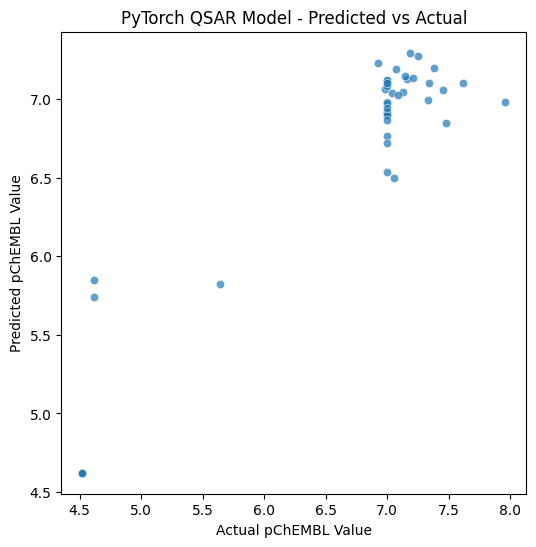

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_actuals, y=y_preds_svm, alpha=0.7)
plt.xlabel("Actual pChEMBL Value")
plt.ylabel("Predicted pChEMBL Value")
plt.title("PyTorch QSAR Model - Predicted vs Actual")
plt.show()
